In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_30279_Z')

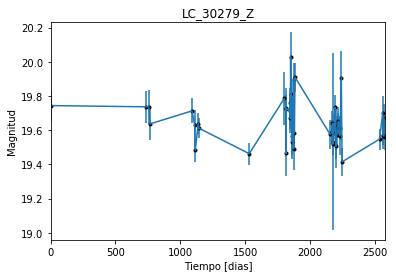

In [2]:
data = np.genfromtxt('LC_30279_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_30279_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

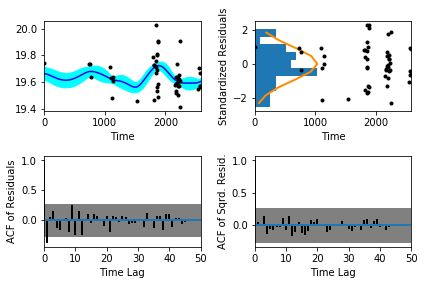

In [5]:
sample.assess_fit()

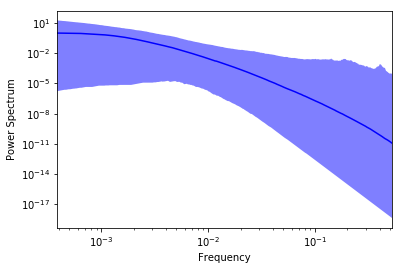

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_30279_Z')

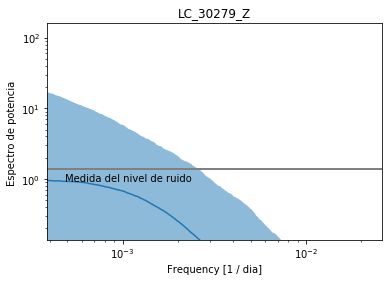

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_30279_Z')

Text(0.5,1,'Prediccion , valor esperado LC_30279_Z')

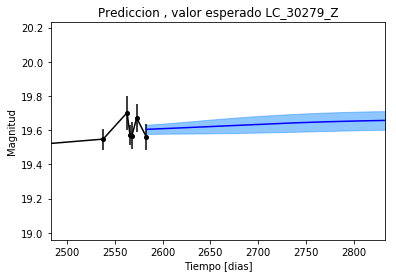

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_30279_Z')

Text(0.5,1,'LC_30279_Z')

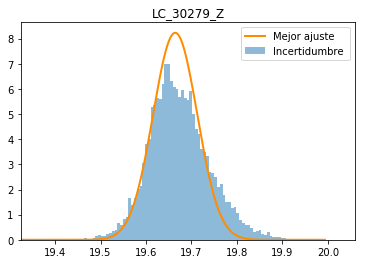

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_30279_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_Z')

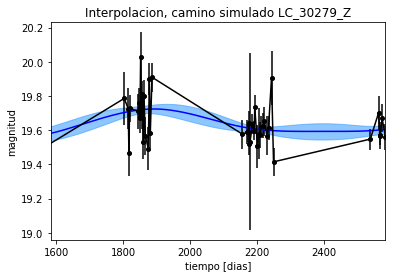

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_Z')

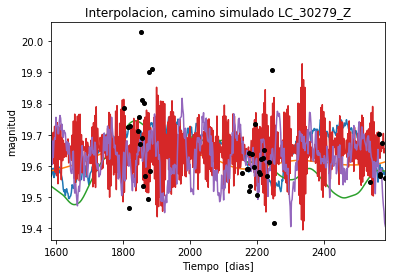

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_Z')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 703.434223043
Median: 0.011954138841
Standard deviation: 0.196871471173
68% credibility interval: [ 0.00098226  0.18508594]
95% credibility interval: [  4.47818503e-04   8.08535500e-01]
99% credibility interval: [  3.96678149e-04   9.86805156e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 575.559245024
Median: 0.00248687717022
Standard deviation: 0.0827323911523
68% credibility interval: [ 0.00065494  0.0276081 ]
95% credibility interval: [ 0.00042052  0.25873965]
99% credibility interval: [  3.92297805e-04   6.62853709e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 3177.64716469
Median: 0.0182848620704
Standard d

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 665.130933743
Median: 61.5905216707
Standard deviation: 1.69966321546
68% credibility interval: [ 59.55990366  62.84299131]
95% credibility interval: [ 57.22670013  63.63745176]
99% credibility interval: [ 55.48388138  64.05009596]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1485.16334532
Median: 0.709414201277
Standard deviation: 2.29138869246
68% credibility interval: [ 0.07065028  3.96155973]
95% credibility interval: [ 0.0177309   7.78118552]
99% credibility interval: [  0.01189575  10.86891351]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 640.493336889
Median: 0.518684822856
Standard deviation: 10.2525857827
68% credibility interval: [  0.0203749   11.06669211]
95% credibility interval: [  9.1819958

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: nan
Median: 3.84590575204e-56
Standard deviation: inf
68% credibility interval: [  3.63841238e-87   1.52255150e+19]
95% credibility interval: [  6.24184384e-143   2.25723072e+124]
99% credibility interval: [  1.14238055e-178   1.93065019e+147]


/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2743.63499757
Median: 19.6323506917
Standard deviation: 0.0412878275781
68% credibility interval: [ 19.60242343  19.66387093]
95% credibility interval: [ 19.55633658  19.72172695]
99% credibility interval: [ 19.49545178  19.79544628]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 433.343296793
Median: 0.0120331499848
Standard deviation: 0.264413660236
68% credibility interval: [ 0.         0.4183418]
95% credibility interval: [ 0.          0.92410681]
99% credibility interval: [ 0.          1.01931974]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 433.343296793
Median: 0.0120331499848
Standard deviation: 0.264413660236
68% credibility interval: [ 0.         0.4183418]
95% credibility interval: [ 0.          0.92410681]
99% credibility interval: [ 0.          1.01931974]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 429.157742957
Median: 0.0
Standard deviation: 0.051007723074
68% credibili

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 665.130933743
Median: 61.5905216707
Standard deviation: 1.69966321546
68% credibility interval: [ 59.55990366  62.84299131]
95% credibility interval: [ 57.22670013  63.63745176]
99% credibility interval: [ 55.48388138  64.05009596]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2854.86673457
Median: 0.00482687551559
Standard deviation: 0.0119054901093
68% credibility interval: [ 0.00187721  0.01232369]
95% credibility interval: [ 0.00041569  0.03618645]
99% credibility interval: [  3.22664684e-05   7.00739071e-02]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1715.97736377
Median: 1.1594099498
Standard deviation: 0.185620598799
68% credibility interval: [ 0.9955954   1.35961425]
95% credibility interval: [ 0.86791691  1.58739084]
99% credibility interval: [ 0.79156288  1.75597407]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: nan
Standard deviation: nan
68% credibility interval: [ nan  nan]
95% credibility interval: [ nan  nan]
99% credibility interval: [ nan  nan]


/usr/lib/python2.7/dist-packages/numpy/lib/function_base.py:3558: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 703.434223043
Median: (-0.0751100695259-0.0819535907565j)
Standard deviation: 2.07128860676
68% credibility interval: [-1.16292923+0.j         -0.00617173-1.38849241j]
95% credibility interval: [ -5.08017837e+00+0.j          -2.81372664e-03-0.00485624j]
99% credibility interval: [ -6.20027966e+00+0.j          -2.49240232e-03-0.01058215j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 575.559245024
Median: (-0.0156255100967+0j)
Standard deviation: 1.74078517525
68% credibility interval: [-0.17346679+0.64591852j -0.00411511+0.j        ]
95% credibility interval: [-1.62570918+5.48756036j -0.00264221+0.j        ]
99% credibility interval: [ -4.16483268e+00+1.78236508j  -2.46487981e-03+0.j        ]
Posterior summary for pa